In [46]:
import pandas as pd

data = pd.read_csv("winequality-red.csv", sep=";")
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
data.shape


(1599, 12)

In [48]:
data.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [49]:
# X = les entrées (infos chimiques)
X = data.drop("quality", axis=1)

# y = la sortie (la note du vin)
y = data["quality"]


In [50]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [51]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)


In [54]:
X_train.shape, X_test.shape


((1279, 11), (320, 11))

In [55]:
y_train.shape, y_test.shape


((1279,), (320,))

In [56]:
from sklearn.ensemble import RandomForestRegressor


In [57]:
rf = RandomForestRegressor(random_state=42)


In [58]:
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
y_pred = rf.predict(X_test)


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   # on calcule la racine à la main
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2


(0.42196875, 0.3013528125, np.float64(0.5489561116337079), 0.5388674666387723)

In [61]:
from sklearn.model_selection import GridSearchCV


In [62]:
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}


In [63]:
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)



In [64]:
grid_search.fit(X_train, y_train)


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="r2")

print("Scores CV :", scores)
print("Score moyen CV :", scores.mean())


Scores CV : [0.33984683 0.4544529  0.3748323  0.42457629 0.53591657]
Score moyen CV : 0.42592497837088883


In [66]:
grid_search.best_params_


{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [67]:
best_model = grid_search.best_estimator_


In [68]:
y_pred_best = best_model.predict(X_test)


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

mae_best, mse_best, rmse_best, r2_best


(0.41539776204681067,
 0.29240619943616986,
 np.float64(0.5407459657141881),
 0.5525576469722531)

In [70]:
import pandas as pd

importances = best_model.feature_importances_

features = X.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df


,Feature,Importance
10,alcohol,0.193207
9,sulphates,0.144779
1,volatile acidity,0.115684
7,density,0.086090
6,total sulfur dioxide,0.082506
4,chlorides,0.072689
2,citric acid,0.070753
8,pH,0.061322
0,fixed acidity,0.060971
3,residual sugar,0.059450


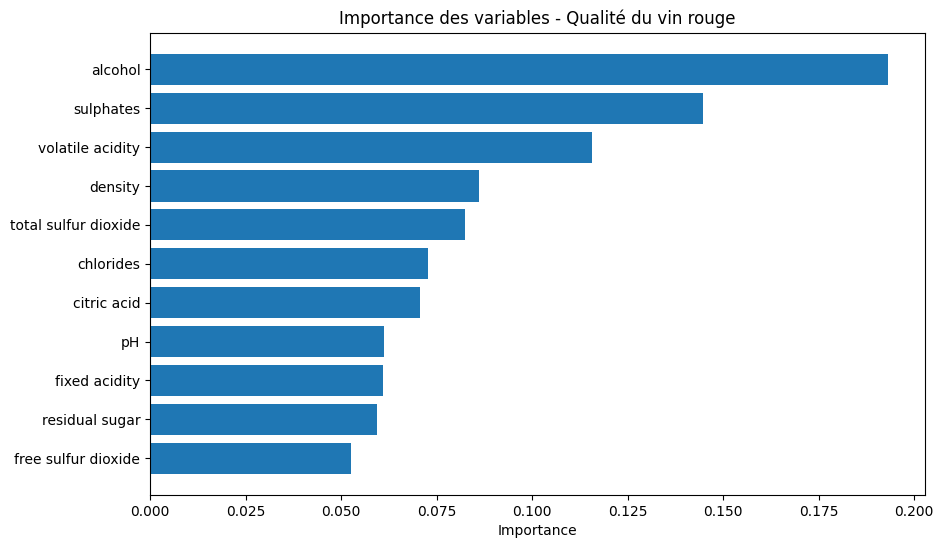

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Importance des variables - Qualité du vin rouge")
plt.xlabel("Importance")
plt.show()


In [72]:
top_features = importance_df["Feature"].head(6).tolist()

top_features


['alcohol',
 'sulphates',
 'volatile acidity',
 'density',
 'total sulfur dioxide',
 'chlorides']

In [73]:
X_reduced = X[top_features]
X_reduced.head()


,alcohol,sulphates,volatile acidity,density,total sulfur dioxide,chlorides
0,9.4,0.56,0.70,0.9978,34.0,0.076
1,9.8,0.68,0.88,0.9968,67.0,0.098
2,9.8,0.65,0.76,0.9970,54.0,0.092
3,9.8,0.58,0.28,0.9980,60.0,0.075
4,9.4,0.56,0.70,0.9978,34.0,0.076


In [74]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reduced, y,
    test_size=0.2,
    random_state=42
)


In [75]:
rf_reduced = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42
)

rf_reduced.fit(Xr_train, yr_train)


,n_estimators,500
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
yr_pred = rf_reduced.predict(Xr_test)

mae_r = mean_absolute_error(yr_test, yr_pred)
mse_r = mean_squared_error(yr_test, yr_pred)
rmse_r = np.sqrt(mse_r)
r2_r = r2_score(yr_test, yr_pred)

mae_r, mse_r, rmse_r, r2_r


(0.42344446548514714,
 0.310034767356278,
 np.float64(0.5568076574152676),
 0.5255822684546562)

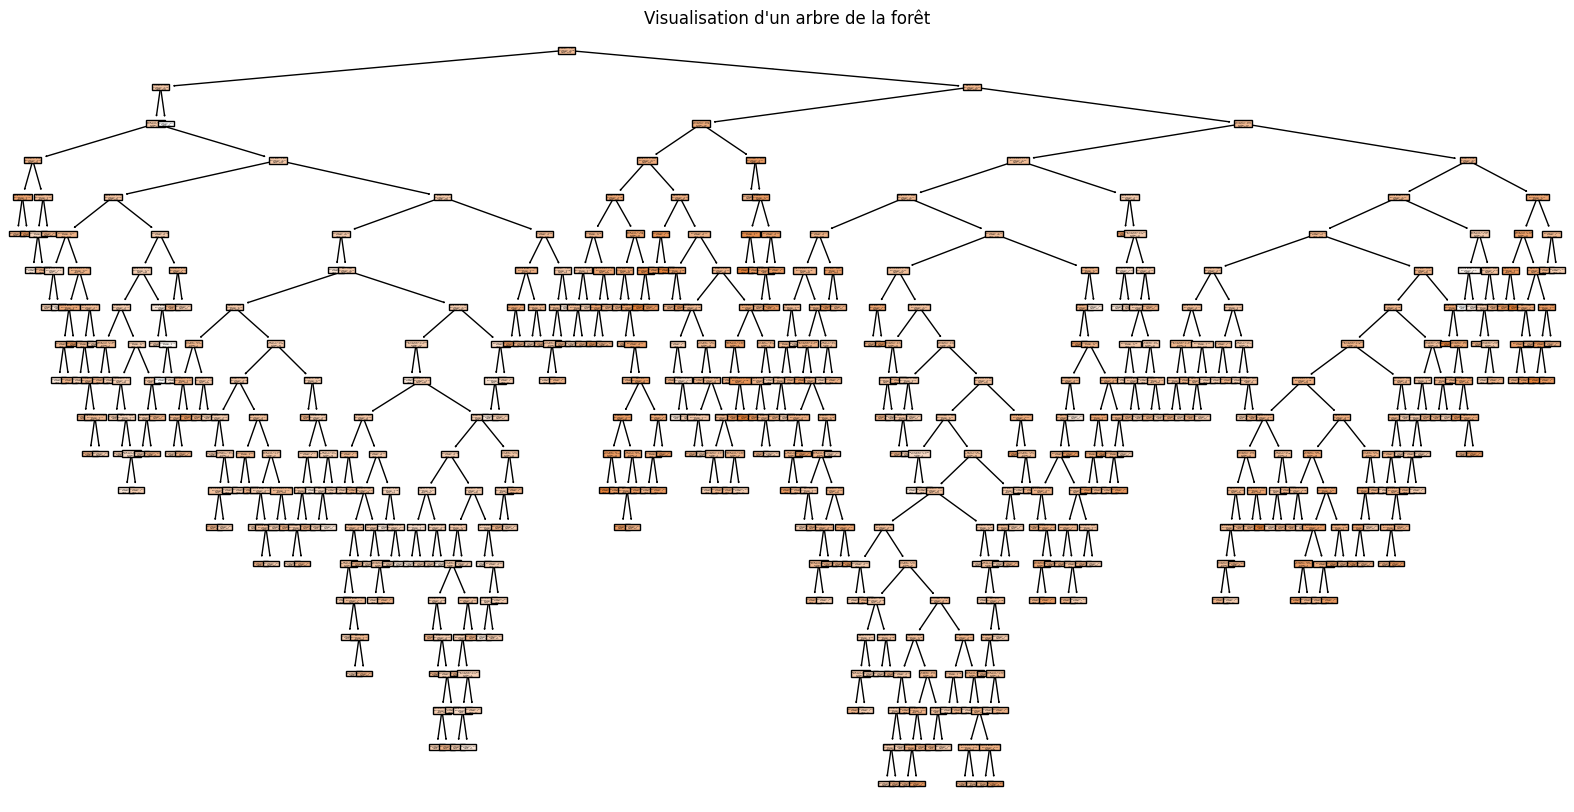

In [77]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_model.estimators_[0], feature_names=X.columns, filled=True)
plt.title("Visualisation d'un arbre de la forêt")
plt.show()


In [78]:
import pandas as pd

# Résultats des 3 modèles
results = {
    "Modèle": ["Random Forest (Base)", "Random Forest (Tuning)", "Random Forest (Features sélectionnées)"],
    "MAE": [0.4224375, 0.4151680, 0.4234444],
    "RMSE": [0.5488516, 0.5407524, 0.5568076],
    "R2": [0.5390430, 0.5525470, 0.5255823]
}

comparison_df = pd.DataFrame(results)
comparison_df



,Modèle,MAE,RMSE,R2
0,Random Forest (Base),0.422438,0.548852,0.539043
1,Random Forest (Tuning),0.415168,0.540752,0.552547
2,Random Forest (Features sélectionnées),0.423444,0.556808,0.525582


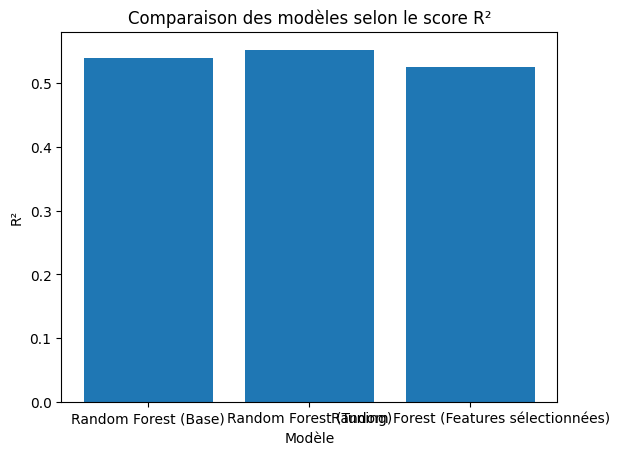

In [79]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(comparison_df["Modèle"], comparison_df["R2"])
plt.title("Comparaison des modèles selon le score R²")
plt.xlabel("Modèle")
plt.ylabel("R²")
plt.show()


In [80]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

mae_gbr, mse_gbr, rmse_gbr, r2_gbr


(0.48532826265358403,
 0.3644197643648829,
 np.float64(0.6036719012550468),
 0.4423619021359553)

In [81]:
results = pd.DataFrame({
    "Modèle": ["Random Forest", "RF Optimisé", "RF Variables Réduites", "Gradient Boosting"],
    "R2": [r2, r2_best, r2_r, r2_gbr],
    "RMSE": [rmse, rmse_best, rmse_r, rmse_gbr]
})

results


,Modèle,R2,RMSE
0,Random Forest,0.538867,0.548956
1,RF Optimisé,0.552558,0.540746
2,RF Variables Réduites,0.525582,0.556808
3,Gradient Boosting,0.442362,0.603672
